In [452]:
import numpy as np
import matplotlib.pyplot as plt
import scipy

# 1b.

In [453]:
def H(z, Omega_m, Omega_lambda):
    return np.sqrt(Omega_m*(1+z)**3 + Omega_lambda)

def calc_d_com(z, Omega_m, Omega_lambda):
    return scipy.integrate.quad(lambda x: 1/H(x, Omega_m, Omega_lambda), 0, z)

In [454]:
z_arr = np.linspace(0, 10, 100)

d_com_1 = [calc_d_com(z, 0.3, 0.7)[0] for z in z_arr]
d_com_2 = [calc_d_com(z, 1.0, 0.0)[0] for z in z_arr]

In [455]:
d_L_1 = d_com_1 * (1+z_arr)
d_ang_1 = d_com_1 / (1+z_arr)
d_L_2 = d_com_2 * (1+z_arr)
d_ang_2 = d_com_2 / (1+z_arr)

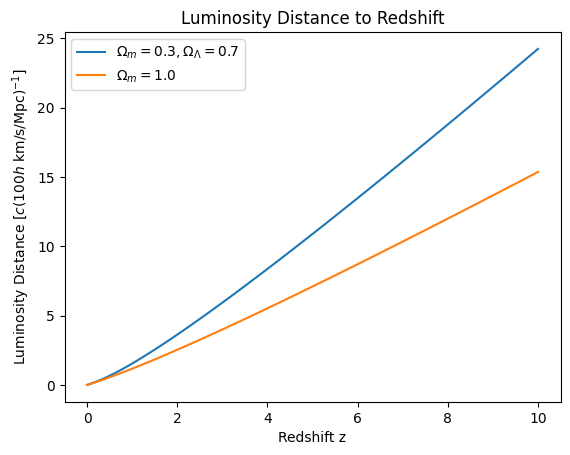

In [456]:
plt.plot(z_arr, d_L_1, label=r'$\Omega_m = 0.3, \Omega_\Lambda = 0.7$')
plt.plot(z_arr, d_L_2, label=r'$\Omega_m = 1.0$')
plt.xlabel('Redshift z')
plt.ylabel(r'Luminosity Distance [$c(100h$ km/s/Mpc$)^{-1}$]')
plt.title('Luminosity Distance to Redshift')
plt.legend()
plt.savefig('Luminosity Distance')
plt.show()

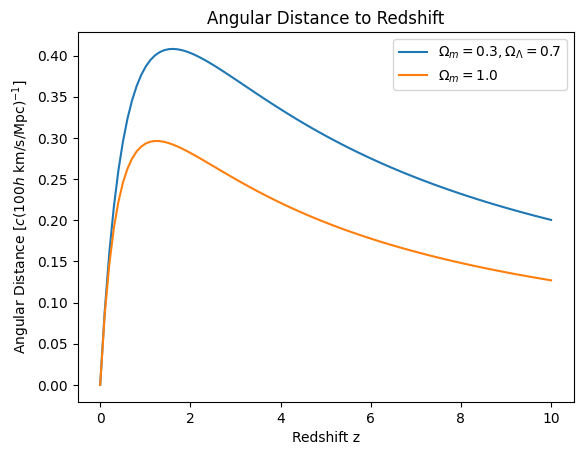

In [457]:
#plt.plot(z_arr, d_L, label='d_L')
plt.plot(z_arr, d_ang_1, label=r'$\Omega_m = 0.3, \Omega_\Lambda = 0.7$')
plt.plot(z_arr, d_ang_2, label=r'$\Omega_m = 1.0$')
plt.xlabel('Redshift z')
plt.ylabel(r'Angular Distance [$c(100h$ km/s/Mpc$)^{-1}$]')
plt.title('Angular Distance to Redshift')
plt.legend()
plt.savefig('Angular Distance')
plt.show()

Angular Distance increases until a turnover point at around z=1, then begins shrinking with redshift. This means that objects at higher redshifts look bigger again.

# 1c.

In [463]:
z_arr = np.linspace(0, 5, 10000)

def calc_age(z, Omega_m, Omega_lambda):
    return scipy.integrate.quad(lambda x: 1/((1+x) * H(x, Omega_m, Omega_lambda)), 0, z)

d_age = np.array([calc_age(z, 0.3, 0.7)[0] for z in z_arr])

Text(0.5, 1.0, 'Age of Universe at Redshift z')

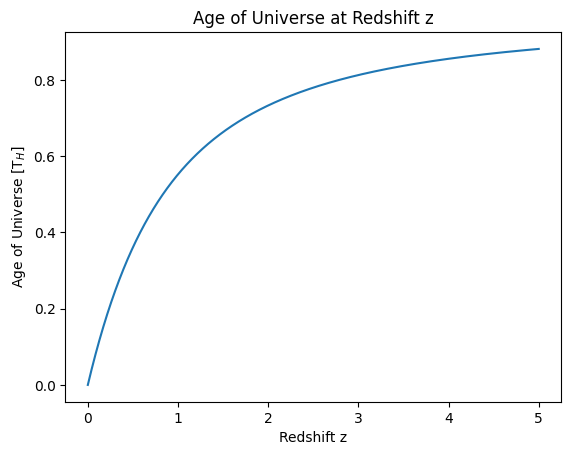

In [464]:
plt.plot(z_arr, d_age)
plt.xlabel('Redshift z')
plt.ylabel(r'Age of Universe [T$_H$]')
plt.title('Age of Universe at Redshift z')

In [465]:
target = 3.24078*10**-18 * 0.7 * 3.1536 * 10**17
print('Target Age: {0}'.format(target))

arg = np.argmin(np.abs(d_age - target))
print('Redshift: {0}'.format(z_arr[arg]))

Target Age: 0.7154086665600001
Redshift: 1.8516851685168516


In [470]:
calc_age(1.852, 0.3, 0.7)[0] - target

3.53314677276062e-05

# 3b.

In [350]:
def est_d_com(z, Omega_m, Omega_lambda):
    return z + z**2/2*(-Omega_m/2 + Omega_lambda - 1) + \
           z**3/24*(3 * Omega_m**2 - 12 * Omega_m * Omega_lambda + 4 * Omega_m + 12 * Omega_lambda **2 - 20 * Omega_lambda + 8) 

In [377]:
z_arr = np.linspace(0, 1.5, 1000)

d_com_actual = np.array([calc_d_com(z, 0.3, 0.7)[0] for z in z_arr])
d_com_est = np.array([est_d_com(z, 0.3, 0.7) for z in z_arr])

error = (d_com_actual - d_com_est)/d_com_actual

C:\Users\dan\AppData\Local\Temp\ipykernel_8848\1346707287.py:6: RuntimeWarning: invalid value encountered in true_divide
  error = (d_com_actual - d_com_est)/d_com_actual


Text(0.5, 1.0, 'Error of Taylor Expansion of Comoving Distance around z=0')

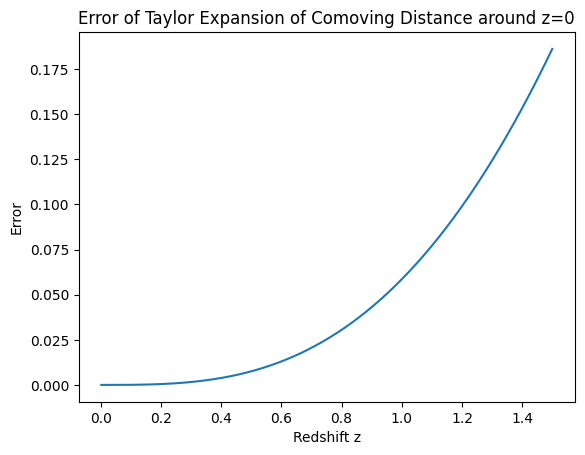

In [378]:
plt.plot(z_arr, error)
plt.xlabel('Redshift z')
plt.ylabel('Error')
plt.title('Error of Taylor Expansion of Comoving Distance around z=0')

In [380]:
target = 0.1
print('Target Error: {0}'.format(target))

arg = np.nanargmin(np.abs(error - 0.1))
print('Redshift: {0}'.format(z_arr[arg]))

Target Error: 0.1
Redshift: 1.2042042042042043


(0.0, 0.01)

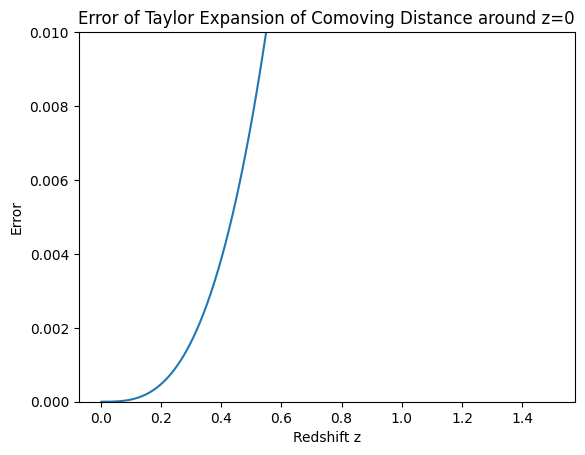

In [381]:
plt.plot(z_arr, error)
plt.xlabel('Redshift z')
plt.ylabel('Error')
plt.title('Error of Taylor Expansion of Comoving Distance around z=0')
plt.ylim(0, 0.01)

In [382]:
z_arr = [0.3]

d_com_actual = np.array([calc_d_com(z, 0.3, 0.7)[0] for z in z_arr])
d_com_est = np.array([est_d_com(z, 0.3, 0.7) for z in z_arr])

error = (d_com_actual - d_com_est)/d_com_actual

In [393]:
print('Error at z=0.3 is {:f}'.format(error[0]))

Error at z=0.3 is 0.001620


In [448]:
z_arr = np.array([0.01, 0.1, 0.2, 0.3])

Omega_m = 0.3
Omega_lambda = 0.7

errors = np.abs(np.array([est_d_com(z, Omega_m, Omega_lambda) / (-z**2/4 + z**3/4*Omega_m -z**3/2*Omega_lambda + z**3/6) for z in z_arr]))

In [449]:
print('Errors for Omega_m: {0}'.format(errors * 0.01))

Errors for Omega_m: [3.97376087 0.37457348 0.17540798 0.1095118 ]


In [450]:
z_arr = np.array([0.01, 0.1, 0.2, 0.3])

Omega_m = 0.3
Omega_lambda = 0.7

errors = np.array([est_d_com(z, Omega_m, Omega_lambda) / (z**2/2 - z**3/2*Omega_m + z**3*Omega_lambda - z**3*5/6) for z in z_arr])

In [451]:
print('Errors for Omega_lambda: {0}'.format(errors * 0.01))

Errors for Omega_lambda: [2.00686247 0.20714046 0.10748684 0.07454719]
